# Week 10: Generalizations of the Poisson process

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## The Homogeneous Poisson Process

We studied in chapter 2 the Poisson process of rate $\lambda$. THe following script compares the empirical distribution of the process $N(t)$ (for example, use $t=100$, $\lambda=0.2$) with the theoretical distribution of $N(t)$ that we know is Poisson($\lambda$).

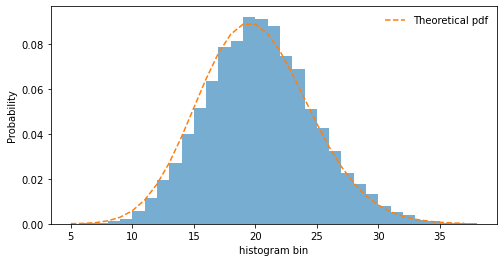

In [10]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math

Lambda = 1/5 #ADD PARAMETER HERE
T= 100 # ADD PARAMETER HERE (maximum time of observation)


def sample_times(Lambda, N):
    return np.random.exponential(1/Lambda, N)

def num_copies_graded(tmax, Lambda):
    t_array = np.linspace(0, tmax, num=100)
    count=np.zeros(100)
    event=0
    while event < t_array[-1]:
        Ti = sample_times(Lambda, 1) #We use the exponential sampling defined in previous block
        event += Ti
        count[t_array >= event] +=1
    return count


# Sample N(t) a number of times
m = 10000
Nt_array = np.zeros(m)
for i in range(m):
    N=num_copies_graded(T, Lambda)
    Nt_array[i] = N[-1]

# Plot the empirical histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("Probability")

binwidth = 1
bins = np.arange(min(Nt_array), max(Nt_array) + binwidth, binwidth)
nt, bins, pr = ax.hist(Nt_array, bins=bins, density=True, alpha=0.6)

# Specify the theoretical pdf in a good range of values
a,b = math.ceil(bins[0]),math.ceil(bins[-1])
f_T = np.zeros(b-a)
for k in range(a,b):
    f_T[k-a] = np.exp(-Lambda*T)*((Lambda*T)**k)/math.factorial(k)  #f is the (discrete) law of N_T

# Plot the theoretical pdf
ax.plot(range(a,b), f_T, '--', label='Theoretical pdf')
ax.legend(loc='best', frameon=False)
plt.show()

## Non-homogeneous Poisson Process

The second definition of a Poisson process seen in class can be extended to define a non-homogeneous Poisson processes, where the rate depends on time: For a non-negative function $\lambda: \mathbb{R}^+ \to \mathbb{R}^+$, the non-homogeneous Poisson process with intensity function $\lambda$ is the unique counting process satisfying 

- $\{N(t): t \geq 0\}$ has independent increments
- $\mathbb{P}(N(t+dt) - N(t) \geq 2) = o(dt)$
- $\mathbb{P}(N(t+dt) - N(t) = 1) = \lambda(t)dt + o(dt)$

See Ross, section 5.4, for more details. In particular, $N(t)$ is equal in distribution to a Poisson random variable with mean $m(t)$ where
$$m(t) = \int_0^t \lambda(s) ds. $$

The following scripts show some examples:

**(a)** $\lambda(t) = ct$ for a constant $c > 0$. 

As an exercise, you can try to show using the above formula that
$$P(N(t) = k) = e^{-\frac12 ct^2}\frac{(\frac12 ct^2)^k}{k!}.$$

We have input this pdf in the block below to verify it matches the histogram generated.

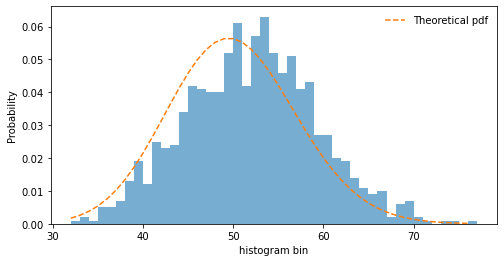

In [11]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

# input data
T = 100
c = 0.01
N_sim = 10**3 # number of simulations

Nt_array = np.zeros(N_sim)

for i in range(N_sim):
    # Simulate arrival times
    arrival_times = [0]
    while arrival_times[-1] < 0.5*c*T**2:
        Ti = np.random.exponential(1)
        new_arrival_time = arrival_times[-1] + Ti # Arrival time for Poisson(1) process
        arrival_times.append(new_arrival_time)

    # Rescale arrival times according to the intensity
    rescaled_arrival_times = [np.sqrt((2/c)*t) for t in arrival_times]
    
    # Sample N(t) by counting the arrivals
    count = 0
    for t in rescaled_arrival_times:
        if t < T:
            count += 1
            
    Nt_array[i] = count
    
    
# Plot the empirical histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("Probability")

binwidth = 1
bins = np.arange(min(Nt_array), max(Nt_array) + binwidth, binwidth)
nt, bins, pr = ax.hist(Nt_array, bins=bins, density=True, alpha=0.6)


# Specify the theoretical pdf in a good range of values
a,b = math.ceil(bins[0]),math.ceil(bins[-1])
f_T = np.zeros(b-a)
for k in range(a,b):
    f_T[k-a] = np.exp(-0.5*c*T**2)*((0.5*c*T**2)**k)/math.factorial(k)  #f is the (discrete) law of N_T

# Plot the theoretical pdf
ax.plot(range(a,b), f_T, '--', label='Theoretical pdf')
ax.legend(loc='best', frameon=False)
plt.show()

**(b)** $\lambda(t) = e^{-ct}$ for a constant $c > 0$. 

SImilarly, you can show as an exercise that
$$P(N(t) = k) = e^{-\frac1c (1 - e^{-ct})}\frac{(\frac1c (1 - e^{-ct}))^k}{k!}.$$

We have input this pdf in the block below to verify it matches the histogram generated.

Remark: As $t \to \infty$ we expect $N(t)$ to be bounded since the intensity $\lambda(t)$ decays exponentially to zero and hence, after a long time has passed, the probability of an arrival occuring during any increment $dt$ of time is negligible. By Markov's inequality we have the following tail bound
$$\lim_{t \to \infty} P(N(t)\geq k) \leq \lim_{t \to \infty} \frac{m(t)}{k} = \frac{1}{ck}. $$

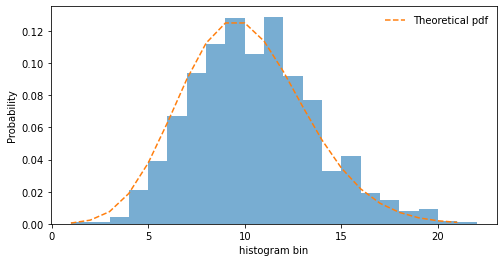

In [8]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

# input data
T = 10**3
c = 0.1
N_sim = 10**3 # number of simulations
lambda_t = lambda t : np.exp(-c*t)

Nt_array = np.zeros(N_sim)


# In part (b) we simulate N(t) using a thinning procedure
def thinning_probability(t, lambda_t_max): 
    return lambda_t(t)/lambda_t_max
    

def simulate_Nt(T):
    t=0
    count=0
    lambda_t_max = 1 # since the lambda_t is a decreasing function the max occurs at t=0
    
    while t<= T:
        r = np.random.uniform(0,1)
        t = t - math.log(r)/lambda_t_max
        s = np.random.uniform(0,1)
        
        if s <= thinning_probability(t, lambda_t_max):
            count += 1
            
    return count
    
    
# Simulate N(t) a number of times to generate the date for the histrogram
for i in range(N_sim):      
    Nt_array[i] = simulate_Nt(T)
    
    
# Plot the empirical histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("Probability")

binwidth = 1
bins = np.arange(min(Nt_array), max(Nt_array) + binwidth, binwidth)
nt, bins, pr = ax.hist(Nt_array, bins=bins, density=True, alpha=0.6)


# Specify the theoretical pdf in a good range of values
a,b = math.ceil(bins[0]),math.ceil(bins[-1])
f_T = np.zeros(b-a)
for k in range(a,b):
    f_T[k-a] = np.exp(-(1/c)*(1-np.exp(-c*T)))*(((1/c)*(1-np.exp(-c*T)))**k)/math.factorial(k)  #f is the (discrete) law of N_T

# Plot the theoretical pdf
ax.plot(range(a,b), f_T, '--', label='Theoretical pdf')
ax.legend(loc='best', frameon=False)
plt.show()

# The 2D Poisson point Process

The Poisson process over time also generalizes to a "point" process over space, that keeps the properties of  independent increment and distribution of points (e.g. number of points is Poisson, conditional distribution is uniform): For the two-dimensional Poisson process, we hence divide our domain into squares $S_{ij} = \left[\frac{i}{m},\frac{i+1}{m}\right)\times\left[\frac{j}{n},\frac{j+1}{n}\right), i \in \{0,...,m-1\}, j \in \{0,..., n-1\}$, sample independent $Poisson(\lambda)$-distributed random variables $Y_{ij}$ (or one $Y \sim Poisson(\lambda)$ multiple times), which represent the number of seeds in square $S_{ij}$, and sample $Y_{ij}$ independent uniform random variables on the square $S_{ij}$.


The following script also shows the resulting Voronoi diagram. For a set of points in $\Omega$, called seeds, sites or generators, the Voronoi tesselation is the partition of $\Omega$ into subsets where each subset is associated with a single seed and consists of the points which are closest to that particular seed. The image of $\Omega$ with its partitions is called a Voronoi diagram. <br/>

In [12]:
import numpy as np

# specify the number of squares
n = 10 # SET NUMBER OF SQUARES IN Y-DIRECTION
m = 10 # SET NUMBER OF SQUARES IN X-DIRECTION

# specify expected number of events occurring in a fixed-time interval 
# (check: where is the time interval?)
lmbda = 1 # PLAY WITH LAMBDA = MU*T

# sample m*n i.i.d. Yij ~ Poisson(lambda)
nseeds_array = np.random.poisson(lam=lmbda, size=m*n)
nseeds_matrix = nseeds_array.reshape(m,n)

# create the point array
points = np.zeros((np.sum(nseeds_array), 2))
idx = 0
for i in range(m):
    for j in range(n):
        for k in range(nseeds_matrix[i,j]):
            # sample a r.v.~ Unif(Sij)
            xijk = np.random.uniform(i/m, (i+1)/m)
            yijk = np.random.uniform(j/n, (j+1)/n)
            # save these coordinates
            points[idx,:] = np.array([xijk,yijk])
            # increase index for points[]
            idx += 1

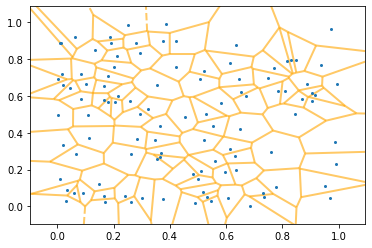

In [13]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# tessellate
vor = Voronoi(points)

# plot
# COMMENT IN THE PLOT OF CHOICE
#fig1 = voronoi_plot_2d(vor)
fig2 = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=4)